<a href="https://colab.research.google.com/github/Pavanikha/Sales-Data-Analysis-Forecasting-System/blob/main/Sales_Data_Analysis_and_Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta

In [ ]:
df = pd.read_csv('/content/sample_data/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Missing values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [ ]:
df_cleaned = df.dropna()
print(df_cleaned)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [ ]:
print("Duplicated values: ",df_cleaned.duplicated().sum())

Duplicated values:  0


In [ ]:
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")
print(df_cleaned.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')


In [ ]:
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'], dayfirst=True, errors='coerce')
df_cleaned['ship_date'] = pd.to_datetime(df_cleaned['ship_date'], dayfirst=True, errors='coerce')


/tmp/ipython-input-902053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'], dayfirst=True, errors='coerce')
/tmp/ipython-input-902053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ship_date'] = pd.to_datetime(df_cleaned['ship_date'], dayfirst=True, errors='coerce')


In [ ]:
print(df_cleaned)

      row_id        order_id order_date  ship_date       ship_mode  \
0          1  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
2          3  CA-2017-138688 2017-06-12 2017-06-16    Second Class   
3          4  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
4          5  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9795    9796  CA-2017-125920 2017-05-21 2017-05-28  Standard Class   
9796    9797  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9797    9798  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9798    9799  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9799    9800  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   

     customer_id     customer_name    segment        country             city  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [ ]:
print(df_cleaned['ship_mode'].unique())


['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [ ]:
mapping = {
    'Second Class': 1,
    'Standard Class': 2,
    'First Class': 3,
    'Same Day': 4
}
df_cleaned['ship_mode'] = df_cleaned['ship_mode'].map(mapping)
print(df_cleaned)  #categorical to numeric

      row_id        order_id order_date  ship_date  ship_mode customer_id  \
0          1  CA-2017-152156 2017-11-08 2017-11-11          1    CG-12520   
1          2  CA-2017-152156 2017-11-08 2017-11-11          1    CG-12520   
2          3  CA-2017-138688 2017-06-12 2017-06-16          1    DV-13045   
3          4  US-2016-108966 2016-10-11 2016-10-18          2    SO-20335   
4          5  US-2016-108966 2016-10-11 2016-10-18          2    SO-20335   
...      ...             ...        ...        ...        ...         ...   
9795    9796  CA-2017-125920 2017-05-21 2017-05-28          2    SH-19975   
9796    9797  CA-2016-128608 2016-01-12 2016-01-17          2    CS-12490   
9797    9798  CA-2016-128608 2016-01-12 2016-01-17          2    CS-12490   
9798    9799  CA-2016-128608 2016-01-12 2016-01-17          2    CS-12490   
9799    9800  CA-2016-128608 2016-01-12 2016-01-17          2    CS-12490   

         customer_name    segment        country             city       sta

/tmp/ipython-input-3538840822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ship_mode'] = df_cleaned['ship_mode'].map(mapping)


In [ ]:
#EDA
print("Mean:\n", df_cleaned.mean(numeric_only=True))
print("\nMedian:\n", df_cleaned.median(numeric_only=True))
print("\nMode:\n", df_cleaned.mode(numeric_only=True).iloc[0])
print("\nVariance:\n", df_cleaned.var(numeric_only=True))



Mean:
 row_id          4896.705588
ship_mode          2.069057
postal_code    55273.322403
sales            230.116193
dtype: float64

Median:
 row_id          4896.000
ship_mode          2.000
postal_code    58103.000
sales             54.384
dtype: float64

Mode:
 row_id             1.00
ship_mode          2.00
postal_code    10035.00
sales             12.96
Name: 0, dtype: float64

Variance:
 row_id         7.994682e+06
ship_mode      5.626601e-01
postal_code    1.026640e+09
sales          3.910027e+05
dtype: float64


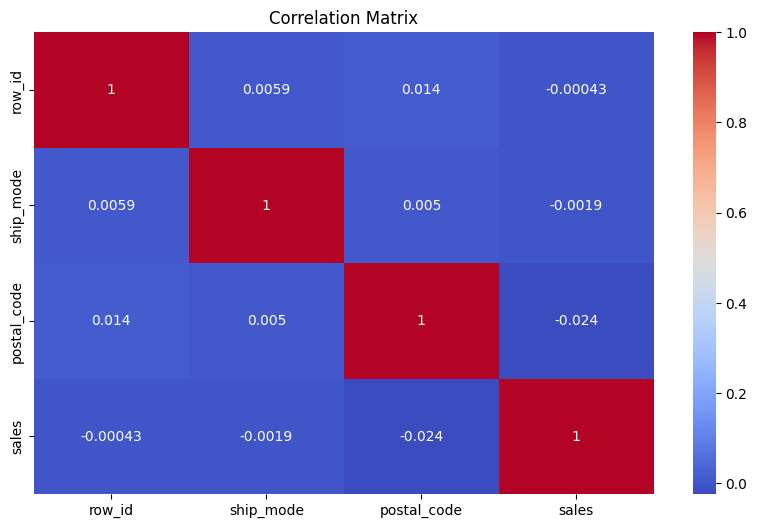

sales          1.000000
row_id        -0.000434
ship_mode     -0.001905
postal_code   -0.024067
Name: sales, dtype: float64


In [ ]:
corr_matrix = df_cleaned.corr(numeric_only=True)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
print(df_cleaned.corr(numeric_only=True)['sales'].sort_values(ascending=False))


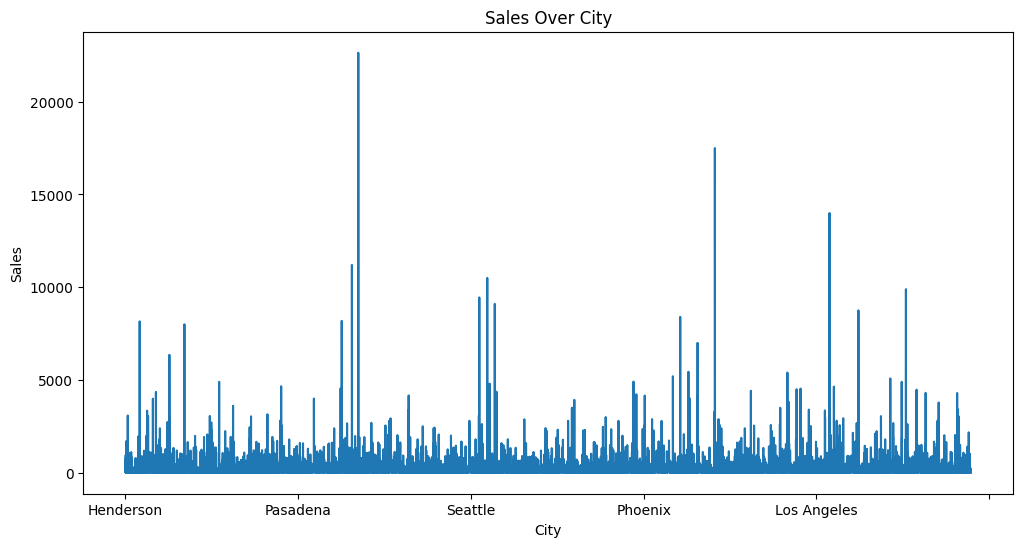

In [ ]:
plt.figure(figsize=(12,6))
df_cleaned.set_index('city')['sales'].plot()
plt.title("Sales Over City")
plt.xlabel("City")
plt.ylabel("Sales")
plt.show()

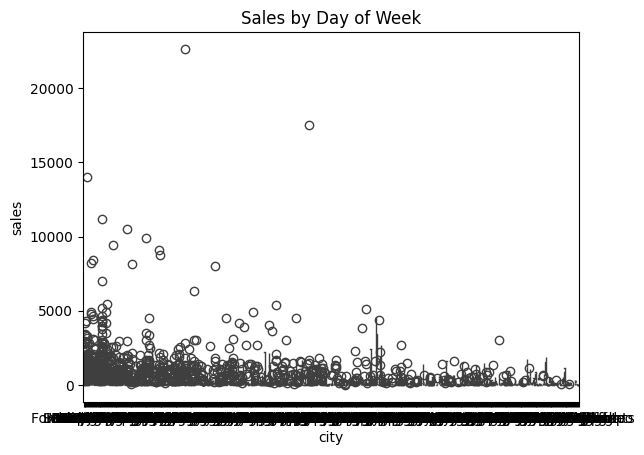

In [ ]:
sns.boxplot(x='city', y='sales', data=df_cleaned)
plt.title("Sales by Day of Week")
plt.show()


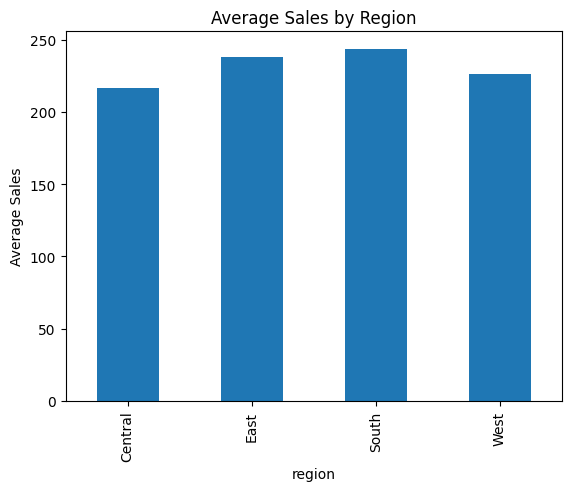

In [ ]:
df_cleaned.groupby('region')['sales'].mean().plot(kind='bar', title='Average Sales by Region')
plt.ylabel("Average Sales")
plt.show()


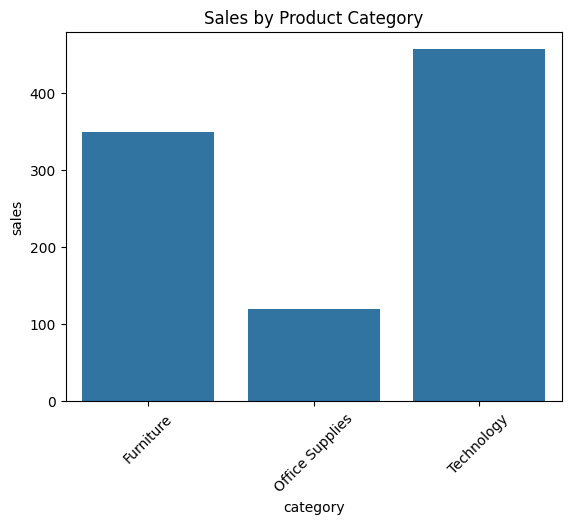

In [ ]:
sns.barplot(x='category', y='sales', data=df_cleaned,errorbar=None)
plt.title("Sales by Product Category")
plt.xticks(rotation=45)
plt.show()


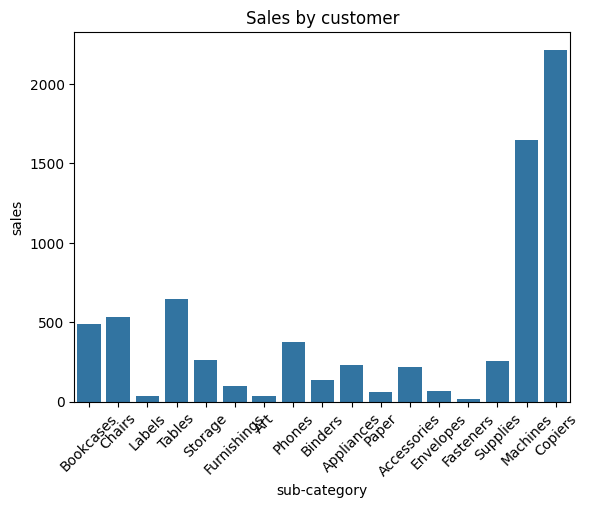

In [ ]:
sns.barplot(x='sub-category', y='sales', data=df_cleaned,errorbar=None)
plt.title("Sales by customer")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df_cleaned['sales'].describe())


count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: sales, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_cleaned['sales_scaled'] = scaler.fit_transform(df_cleaned[['sales']])


/tmp/ipython-input-389451108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sales_scaled'] = scaler.fit_transform(df_cleaned[['sales']])


In [ ]:
print(df_cleaned['sales_scaled'].describe())


count    9.789000e+03
mean    -3.974074e-17
std      1.000051e+00
min     -3.673167e-01
25%     -3.404420e-01
50%     -2.810500e-01
75%     -3.154507e-02
max      3.583789e+01
Name: sales_scaled, dtype: float64


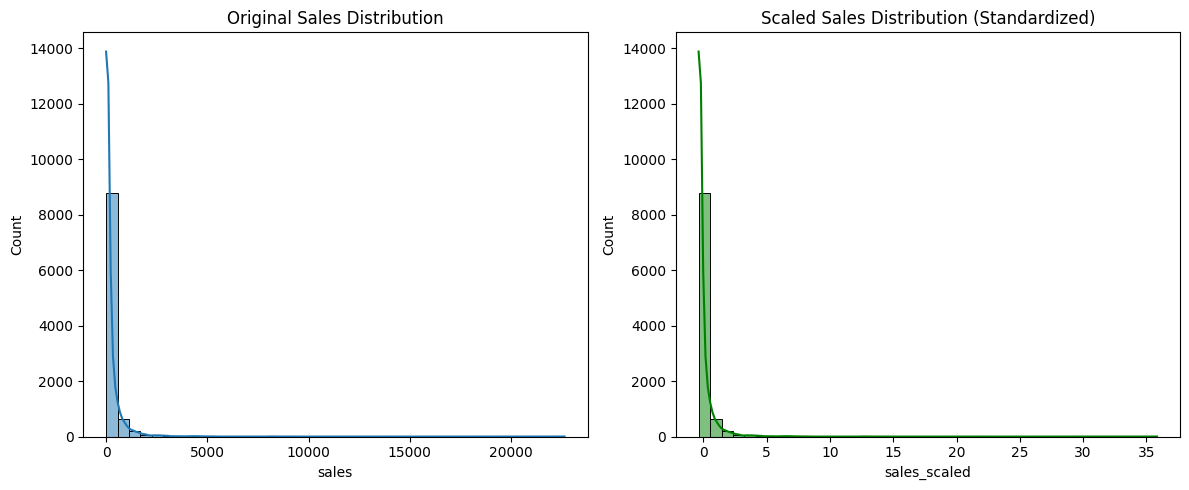

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['sales'], bins=40, kde=True)
plt.title("Original Sales Distribution")

# Scaled
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['sales_scaled'], bins=40, kde=True, color='green')
plt.title("Scaled Sales Distribution (Standardized)")

plt.tight_layout()
plt.show()


In [ ]:
print(df_cleaned['sales'])

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: sales, Length: 9789, dtype: float64


In [ ]:
df_sales_daily = df_cleaned.groupby('order_date')['sales'].sum().reset_index()
df_sales_daily = df_sales_daily.set_index('order_date').asfreq('D').fillna(0).reset_index()

In [ ]:
print(df_sales_daily)

     order_date      sales
0    2015-01-03    16.4480
1    2015-01-04   288.0600
2    2015-01-05    19.5360
3    2015-01-06  4407.1000
4    2015-01-07    87.1580
...         ...        ...
1453 2018-12-26   814.5940
1454 2018-12-27   177.6360
1455 2018-12-28  1657.3508
1456 2018-12-29  2915.5340
1457 2018-12-30   713.7900

[1458 rows x 2 columns]


In [ ]:
df_sales_daily.to_csv('salesdaily.csv', index=False)


In [ ]:
print(df_cleaned.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'sales_scaled'],
      dtype='object')


In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/train.csv')
print(df_cleaned.columns)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'sales_scaled'],
      dtype='object')


In [ ]:
print(df_cleaned.columns)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'sales_scaled'],
      dtype='object')


In [ ]:
import pandas as pd

# Load your cleaned dataset again (if needed)
df = df_cleaned.copy()  # assuming df_cleaned is already loaded

# Extract datetime features
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["order_day"] = df["order_date"].dt.day
df["ship_year"] = df["ship_date"].dt.year
df["ship_month"] = df["ship_date"].dt.month
df["ship_day"] = df["ship_date"].dt.day

# Drop columns not needed
df = df.drop(columns=["order_date", "ship_date", "order_id", "customer_id", "product_id", "product_name", "customer_name"])

# Double-check 'sales' exists
assert "sales" in df.columns, "⚠️ 'sales' column is missing!"


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
print(df_cleaned.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'sales_scaled'],
      dtype='object')


In [ ]:
bins = [0, 100, 500, df["sales"].max()]
labels = ["Low", "Medium", "High"]
df["sales_category"] = pd.cut(df["sales"], bins=bins, labels=labels)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X = df_encoded.drop("sales", axis=1)
y = df["sales_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.2f}")


✅ Accuracy: 0.99


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


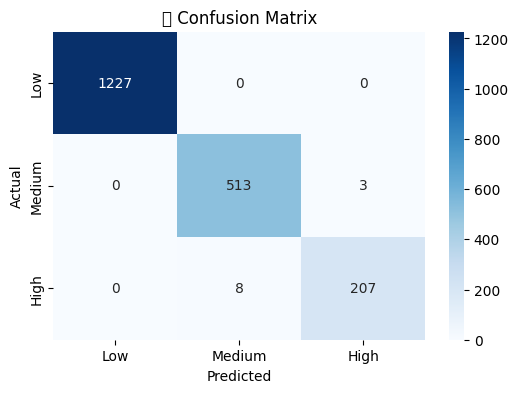

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


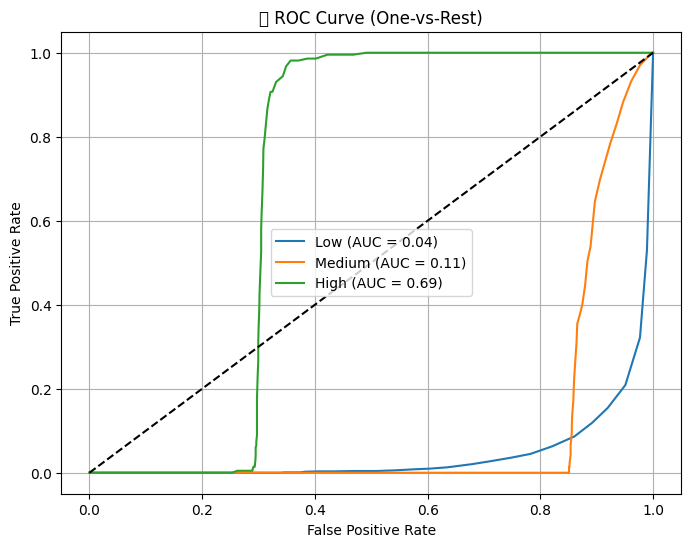

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=labels)
y_prob = clf.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8,6))
for i, label in enumerate(labels):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🔍 ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-85323055.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="crest")
/tmp/ipython-input-85323055.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


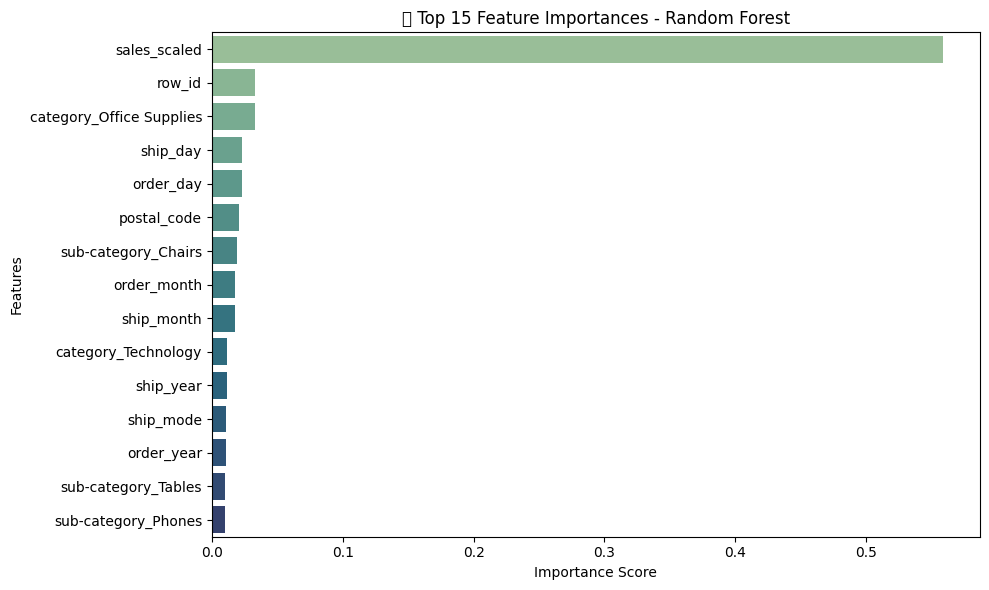

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔍 Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="crest")
plt.title("🔍 Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


✅ Improved SVM Accuracy: 0.76


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


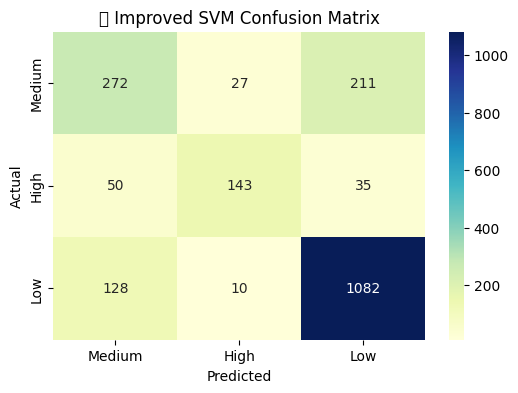

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df_encoded.drop("sales", axis=1)
y = df["sales_category"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(
    kernel="rbf",
    C=10,
    gamma=0.01,
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)


acc_svm = accuracy_score(y_test, svm_pred)
print(f"✅ Improved SVM Accuracy: {acc_svm:.2f}")

labels = y.unique()
cm = confusion_matrix(y_test, svm_pred, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Improved SVM Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


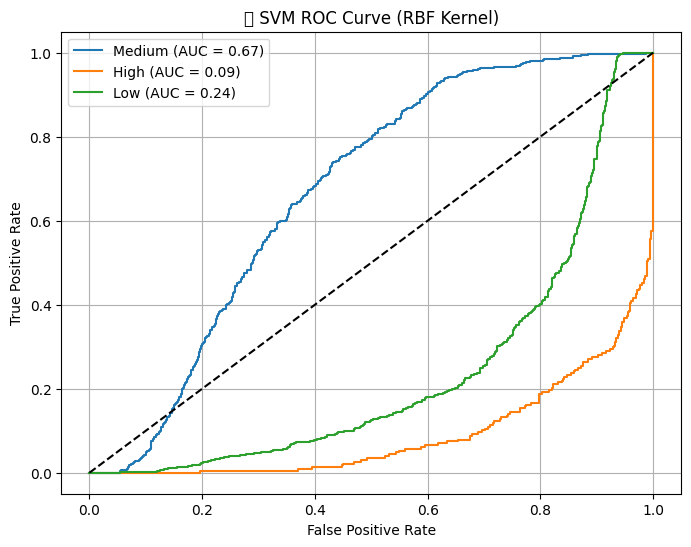

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC



svm_model = SVC(kernel="rbf", C=10, gamma=0.01, probability=True, random_state=42)


svm_model.fit(X_train_scaled, y_train)

svm_prob = svm_model.predict_proba(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)

labels = y.unique()
y_test_bin = label_binarize(y_test, classes=labels)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🔍 SVM ROC Curve (RBF Kernel)")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


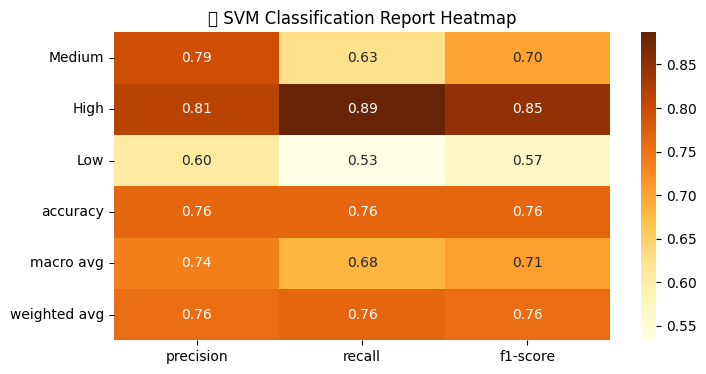

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, svm_pred, output_dict=True, target_names=labels)
df_report = pd.DataFrame(report).iloc[:-1, :].T

plt.figure(figsize=(8, 4))
sns.heatmap(df_report, annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("📋 SVM Classification Report Heatmap")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


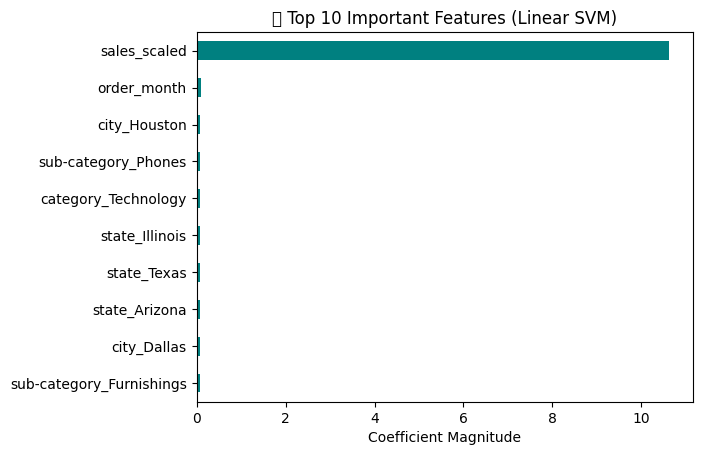

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

feature_importance = pd.Series(np.abs(svm_linear.coef_).mean(axis=0), index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', color='teal')
plt.title("📌 Top 10 Important Features (Linear SVM)")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.show()


✅ Ridge Regression Accuracy (as classifier): 0.74


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


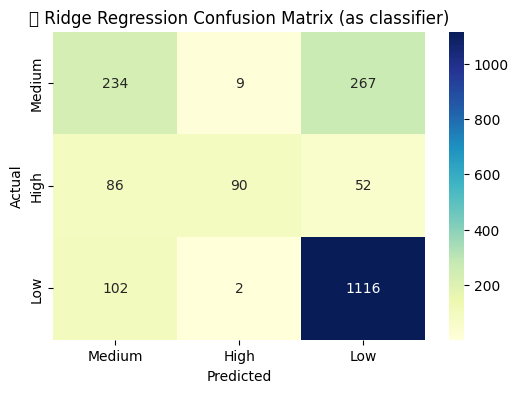

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ridge_reg = Ridge(alpha=1.0)
y_train_bin = label_binarize(y_train, classes=labels)
ridge_reg.fit(X_train_scaled, y_train_bin)

y_pred_cont = ridge_reg.predict(X_test_scaled)


def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

y_pred_probs = softmax(y_pred_cont)


y_pred_index = np.argmax(y_pred_probs, axis=1)
y_pred_class = np.array(labels)[y_pred_index]


acc_ridge = accuracy_score(y_test, y_pred_class)
print(f"✅ Ridge Regression Accuracy (as classifier): {acc_ridge:.2f}")

cm_ridge = confusion_matrix(y_test, y_pred_class, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ridge, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Ridge Regression Confusion Matrix (as classifier)")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


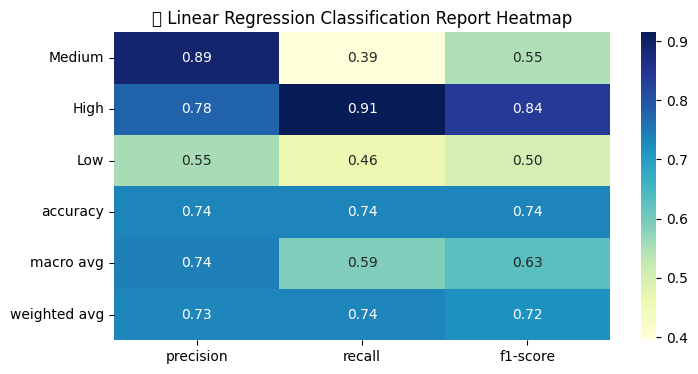

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred_class, output_dict=True, target_names=labels)
df_report = pd.DataFrame(report).iloc[:-1, :].T

plt.figure(figsize=(8, 4))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("📋 Linear Regression Classification Report Heatmap")
plt.show()


/tmp/ipython-input-953471802.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_class, palette="Set2")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


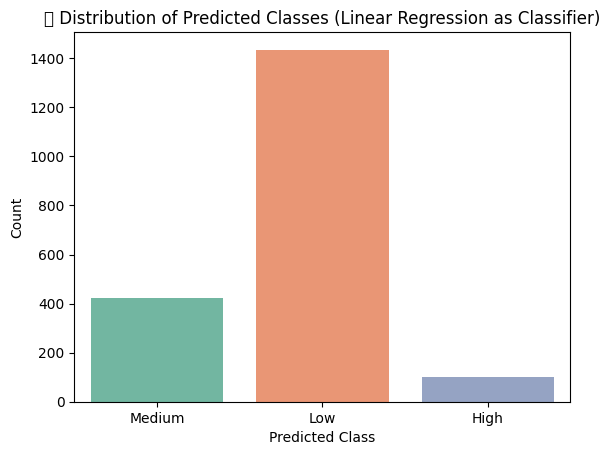

In [ ]:
sns.countplot(x=y_pred_class, palette="Set2")
plt.title("🔍 Distribution of Predicted Classes (Linear Regression as Classifier)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


TO DOWNLOAD THE DATASET

In [ ]:
df.to_csv("cleaned_data.csv", index=False)


In [ ]:
from google.colab import files
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>